# **PROYEK ANALISIS DATA**

Aurel Elviolita Putri  
M204B4KX0735@bangkit.academy  
M204B4KX0735




### **MENENTUKAN PERTANYAAN BISNIS**

1.   Bagaimana tren penyewaan sepeda dari tahun 2011 hingga 2012? Tahun mana yang menunjukkan kinerja yang lebih baik?
2.   Bagaimana perbandingan penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?
3.   Apa pola penyewaan sepeda antara hari libur, hari kerja, dan hari biasa?
4.   Apa hubungan antara suhu (temp dan atemp), kelembapan (hum), dan kecepatan angin dengan total penyewaan sepeda?
5.   Bagaimana perubahan musim dan kondisi cuaca memengaruhi total penyewaan sepeda?


### **IMPORT SEMUA PACKAGE/LIBRARY YANG DIPERLUKAN**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **DATA WRAGLING**

### **GATHERING DATA**

In [4]:
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
hour_df = pd.read_csv("hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## **ASSESING DATA**

### **CEK INFORMASI DATA**

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### **CEK MISSING VALUE**

In [8]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
hour_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

tidak terdapat missing value dari dua dataset tersebut.

### **CEK DUPLIKASI DATA**

In [10]:
print("Jumlah duplikasi data Day:", day_df.duplicated().sum())

Jumlah duplikasi data Day: 0


In [11]:
print("Jumlah duplikasi data Hour:", hour_df.duplicated().sum())

Jumlah duplikasi data Hour: 0


### **CEK STATISTIKA DATA**

In [12]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [13]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## **CLEANING DATA**

### **MENGHAPUS DATA YANG TIDAK BERGUNA**

In [18]:
del hour_df

### **MENGHAPUS KOLOM YANG TIDAK BERGUNA**

In [19]:
drop_col = ["instant"]

for i in day_df.columns:
  if i in drop_col:
    day_df.drop(labels=i, axis=1, inplace=True)

day_df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **MELENGKAPI NAMA KOLOM**

In [20]:
day_df.rename(columns={
    "dteday": "date_day",
    "yr": "year",
    "mnth": "month",
    "weathersit": "weather_category",
    "hum": "humidity",
    "cnt": "count"
}, inplace=True)

day_df.head()

,date_day,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### **MELENGKAPI NOMOR DI KATEGORI SEASON, YEAR, MONTH, DAY, WEATHER**

In [21]:
day_df["season"] = day_df["season"].map({
    1: "Spring", 2: "Summer", 3: "Fall", 4: "Winter"
})
day_df["year"] = day_df["year"].map({
    0: "2011", 1: "2012"
})
day_df["month"] = day_df["month"].map({
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
})
day_df["weekday"] = day_df["weekday"].map({
    0: "Sun", 1: "Mon", 2: "Tue", 3: "Wed", 4: "Thu", 5: "Fri", 6: "Sat"
})
day_df["weather_category"] = day_df["weather_category"].map({
    1: "Clear/Partly Cloudy",
    2: "Misty/Cloudy",
    3: "Light Rain/Snow",
    4: "Heavy Rain/Snow"
})

### **MERUBAH DTYPE YANG SALAH**

In [24]:
day_df["date_day"] = pd.to_datetime(day_df.date_day)
day_df["season"] = day_df.season.astype("category")
day_df["year"] = day_df.year.astype("category")
day_df["month"] = day_df.month.astype("category")
day_df["holiday"] = day_df.holiday.astype("category")
day_df["weekday"] = day_df.weekday.astype("category")
day_df["workingday"] = day_df.workingday.astype("category")
day_df["weather_category"] = day_df.weather_category.astype("category")

day_df.head()

,date_day,season,year,month,holiday,weekday,workingday,weather_category,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,Spring,2011,Jan,0,Sat,0,Misty/Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,Spring,2011,Jan,0,Sun,0,Misty/Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,Spring,2011,Jan,0,Mon,1,Clear/Partly Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,Spring,2011,Jan,0,Tue,1,Clear/Partly Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,Spring,2011,Jan,0,Wed,1,Clear/Partly Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [25]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date_day          731 non-null    datetime64[ns]
 1   season            731 non-null    category      
 2   year              731 non-null    category      
 3   month             731 non-null    category      
 4   holiday           731 non-null    category      
 5   weekday           731 non-null    category      
 6   workingday        731 non-null    category      
 7   weather_category  731 non-null    category      
 8   temp              731 non-null    float64       
 9   atemp             731 non-null    float64       
 10  humidity          731 non-null    float64       
 11  windspeed         731 non-null    float64       
 12  casual            731 non-null    int64         
 13  registered        731 non-null    int64         
 14  count             731 non-

In [26]:
day_df.to_csv('day_dataset.csv', index=False)

## **EXPLORATORY DATA ANALYSIS**

### **MENGEKSPLORE TREND BIKE-SHARING DARI TAHUN 2011 SAMPAI TAHUN 2012**

In [27]:
day_df.groupby(by=["year", "month"], observed=False).agg({
    "count": ["max", "min", "mean", "sum"]
})

count                           
             max   min         mean     sum
year month                                 
2011 Apr    5312   795  3162.333333   94870
     Aug    5895  1115  4409.387097  136691
     Dec    3940   705  2816.870968   87323
     Feb    2927  1005  1721.964286   48215
     Jan    1985   431  1231.903226   38189
     Jul    6043  3285  4559.387097  141341
     Jun    5515  3767  4783.733333  143512
     Mar    3239   605  2065.967742   64045
     May    5805  2633  4381.322581  135821
     Nov    4486  1495  3405.566667  102167
     Oct    5511   627  3984.225806  123511
     Sep    5423  1842  4247.266667  127418
2012 Apr    7460  1027  5807.466667  174224
     Aug    7865  4549  6919.451613  214503
     Dec    6606   441  3990.741935  123713
     Feb    5062  1529  3556.448276  103137
     Jan    4521  1301  3120.774194   96744
     Jul    8173  4459  6567.967742  203607
     Jun    8120  4127  6761.000000  202830
     Mar    8362  3194  5318.548387  164875
     May    8294  2843  6318.225806  195865
     Nov    6852  2277  5088.800000  152664
     Oct    8156    22  6414.225806  198841
     Sep    8714  4073  7285.766667  218573

### **MENGEKSPLORE PERBEDAAN ANTARA KASUAL DAN REGISTERED**

In [28]:
day_df.groupby(by=["year"], observed=False).agg({
    "casual": ["max", "min", "sum"],
    "registered": ["max", "min", "sum"]
})

casual             registered              
        max min     sum        max  min      sum
year                                            
2011   3065   9  247252       4614  416   995851
2012   3410   2  372765       6946   20  1676811

### **MENGEKSPLORE TOTAL PEMINJAMAN SEPEDA PADA WAKTU WEEKDAY, HOLIDAY, DAN WORKINGDAY**

In [29]:
day_df.groupby(by=["weekday"], observed=False).agg({
    "count": ["max", "min", "mean"]
})

count                   
          max   min         mean
weekday                         
Fri      8362  1167  4690.288462
Mon      7525    22  4338.123810
Sat      8714   627  4550.542857
Sun      8227   605  4228.828571
Thu      7804   431  4667.259615
Tue      7767   683  4510.663462
Wed      8173   441  4548.538462

In [30]:
day_df.groupby(by = ["holiday"], observed=False).agg({
    "count": ["sum", "max", "min", "mean"]
})

count                         
             sum   max   min         mean
holiday                                  
0        3214244  8714    22  4527.104225
1          78435  7403  1000  3735.000000

In [31]:
day_df.groupby(by = ["workingday"], observed=False).agg({
    "count": ["sum", "max", "min", "mean"]
})

count                        
                sum   max  min         mean
workingday                                 
0           1000269  8714  605  4330.168831
1           2292410  8362   22  4584.820000

### **MENGEKSPLORE TEMPERATURE, HUMIDITY, DAN WINDSPEED**

In [32]:
day_df.groupby(by = "season", observed=False).agg({
    "temp": ["max", "min", "mean"],
    "atemp": ["max", "min", "mean"],
    "humidity": ["max", "min", "mean"],
    "windspeed": ["max", "min", "mean"]
})

temp                         atemp                      humidity  \
             max       min      mean       max       min      mean       max   
season                                                                         
Fall    0.861667  0.469167  0.706309  0.840896  0.242400  0.655898  0.939565   
Spring  0.572500  0.059130  0.297748  0.548617  0.079070  0.296914  0.948261   
Summer  0.808333  0.253043  0.544405  0.757579  0.250339  0.520307  0.922500   
Winter  0.657500  0.220833  0.422906  0.607975  0.227913  0.415539  0.972500   

                           windspeed                      
             min      mean       max       min      mean  
season                                                    
Fall    0.360000  0.633482  0.375617  0.064071  0.172095  
Spring  0.000000  0.582903  0.507463  0.045408  0.214537  
Summer  0.254167  0.626948  0.388067  0.065929  0.203507  
Winter  0.333478  0.668719  0.422275  0.022392  0.171995

### **MENGEKSPLORE PENGARUH KONDISI CUACA DAN MUSIM**

In [33]:
day_df.groupby(by = ["season", "weather_category"], observed=False).agg({
    "count": ["max", "min", "mean"]
})

count                   
                             max   min         mean
season weather_category                            
Fall   Clear/Partly Cloudy  8714  3285  5878.257353
       Light Rain/Snow      4459  1842  2751.750000
       Misty/Cloudy         7582  1115  5222.479167
Spring Clear/Partly Cloudy  6312   431  2811.135135
       Light Rain/Snow      2169   441   934.750000
       Misty/Cloudy         7836   605  2357.166667
Summer Clear/Partly Cloudy  8294  2028  5548.548673
       Light Rain/Snow      1685   795  1169.000000
       Misty/Cloudy         8362  1471  4236.705882
Winter Clear/Partly Cloudy  8555  1495  5043.563107
       Light Rain/Snow      4639    22  1961.600000
       Misty/Cloudy         7852  1096  4654.000000

## **VISUALIZATION & EXPLANATORY ANALYSIS**

### **PERTANYAAN 1: Bagaimana tren penyewaan sepeda dari tahun 2011 hingga 2012? Tahun mana yang menunjukkan kinerja yang lebih baik?**

/tmp/ipykernel_17135/3788405620.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_counts = day_df.groupby(by=["year", "month"]).agg({


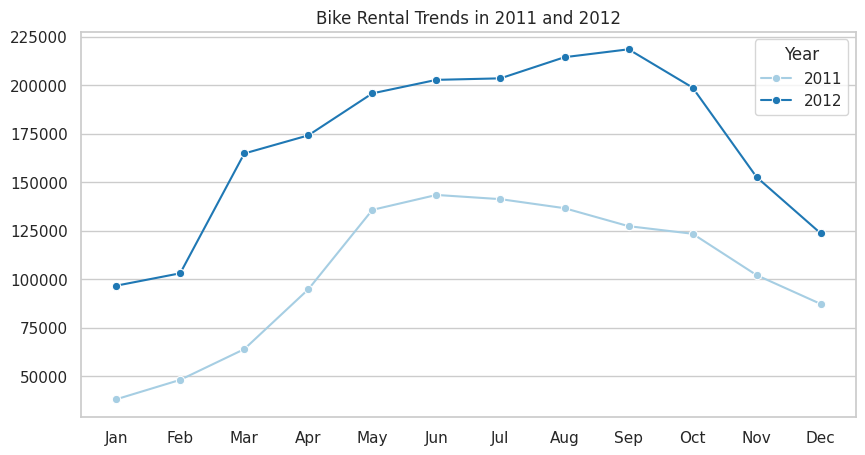

In [34]:
day_df["month"] = pd.Categorical(day_df["month"], categories=
    ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"],
    ordered=True)

monthly_counts = day_df.groupby(by=["year", "month"]).agg({
    "count": "sum"
}).reset_index()

# Set the style
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(
    data = monthly_counts,
    x = "month",
    y = "count",
    hue = "year",
    palette = "Paired",
    marker = "o"
)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Bike Rental Trends in 2011 and 2012")
plt.legend(title = "Year", loc = "upper right")
plt.gca().xaxis.grid(False)
plt.show()

### **PERTANYAAN 2: Bagaimana perbandingan penyewaan sepeda antara pengguna kasual dan pengguna terdaftar?**

/tmp/ipykernel_17135/664895642.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  user_counts = day_df.groupby(by="year").agg({


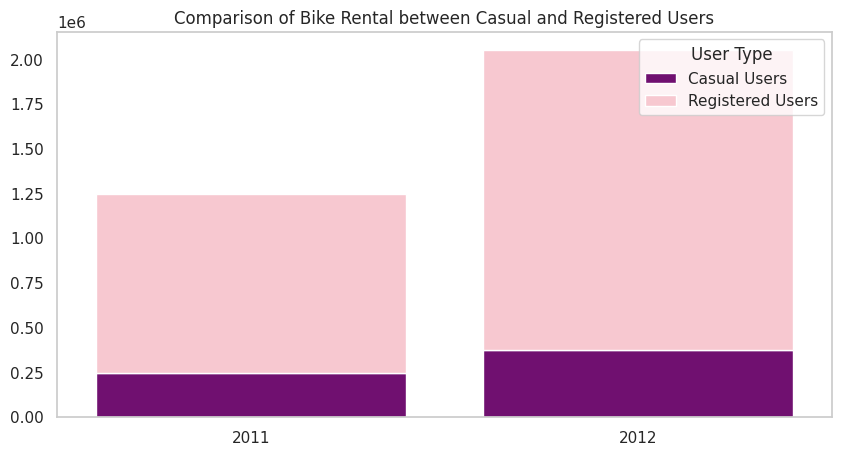

In [37]:
user_counts = day_df.groupby(by="year").agg({
    "casual": "sum",
    "registered": "sum"
}).reset_index()

# Set the style
sns.set(style="whitegrid")

# Create a figure and axis
plt.figure(figsize=(10, 5))

# Plot the data using seaborn"s barplot
sns.barplot(data = user_counts, x = "year", y="casual", color="purple", label="Casual Users")
sns.barplot(data = user_counts, x = "year", y="registered", color="pink", label="Registered Users", bottom=user_counts["casual"])

# Add label and title
plt.xlabel(None)
plt.ylabel(None)
plt.title("Comparison of Bike Rental between Casual and Registered Users")

# Add a legend
plt.legend(title = "User Type", loc = "upper right")

plt.grid(False)
plt.show()

### **PERTANYAAN 3: Apa pola penyewaan sepeda antara hari libur, hari kerja, dan hari biasa?**